## ASSIGNMENT 1

Dataset: https://data.world/uci/dota2-games-results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your CSV dataset (replace 'your_dataset.csv' with your actual CSV file)
df = pd.read_csv('dota2Train.csv')

print("Data is loaded, Now Calculating... It might take a while...")
# Extract features (assuming all columns are features)
X = df.iloc[:, :].values

# Standardize the features (important for spectral clustering)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction (optional but can be helpful)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Perform spectral clustering
n_clusters = 3  # You can adjust the number of clusters based on your dataset
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X_std)

# Visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Spectral Clustering on Your Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Data is loaded, Now Calculating... It might take a while...



Eigenvector Centrality Assignment 1

Given the following graph below, find it eigenvector centralty:


Eigenvector Centrality:
a: 0.51807347662071
b: 0.21182192277183212
c: 0.5986761070959697
d: 0.4566010978754134
e: 0.24477918831750853
f: 0.24477918831750853


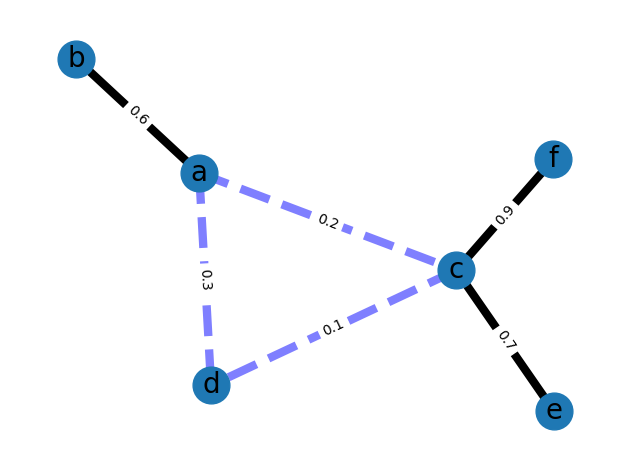

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

# Eigenvector Centrality Calculation
eigenvector_centrality = nx.eigenvector_centrality(G)

# Printing the centrality for each node
print("Eigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality}")

pos = nx.spring_layout(G, seed=7)
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


ASSIGNMENT 2

Topic: Gaming Satisfaction with in-game socialization 

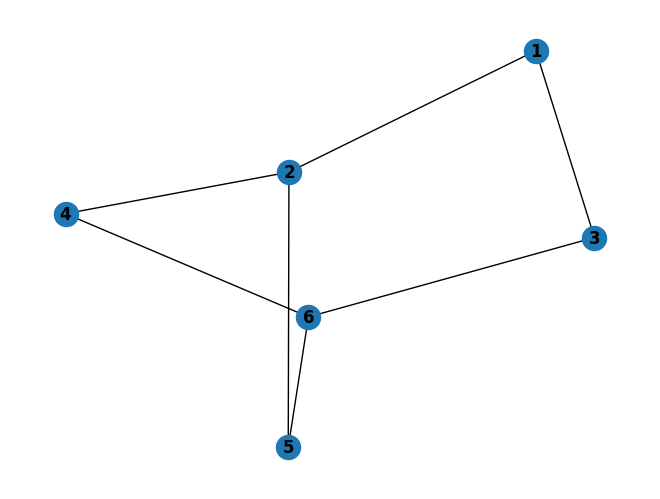

Node 1: 0.34139376017524525
Node 2: 0.4750065124927027
Node 3: 0.34139376017524525
Node 4: 0.39726453856709515
Node 5: 0.39726453856709515
Node 6: 0.4750065124927027
There is no significant correlation between in-game connections and gaming satisfaction.


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (4, 6), (5, 6)]

# Create a graph
G = nx.Graph()
G.add_edges_from(edges)

# Visualize the network (optional)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print eigenvector centrality for each node
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")

# Hypothesis: Players with more in-game connections have higher overall gaming satisfaction.

satisfaction_scores = {1: 8, 2: 7, 3: 6, 4: 9, 5: 8, 6: 7}

# Calculate the correlation between eigenvector centrality and satisfaction scores
correlation = nx.degree_pearson_correlation_coefficient(G)

# Draw a conclusion
if correlation > 0:
    print("There is a positive correlation between in-game connections and gaming satisfaction.")
else:
    print("There is no significant correlation between in-game connections and gaming satisfaction.")
